In [2]:
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku
from keras.optimizers import Adam

# set seeds for reproducability
import tensorflow
tensorflow.random.set_seed(2)
from numpy.random import seed
seed(1)

import pandas as pd
import numpy as np
import string, os

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


In [3]:
curr_dir = './'
all_headlines = []
for filename in os.listdir(curr_dir):
    if 'train' in filename:
        article_df = pd.read_csv(curr_dir + filename)
        all_headlines.extend(list(article_df.sentence1.values))
        break

all_headlines = [h for h in all_headlines if h != "Unknown"]
len(all_headlines)

def clean_text(txt):
    # Diğer temizleme işlemleri
    txt = txt.lower()

    # Türkçe karakterleri silmemek için
    txt = ''.join(char if ord(char) < 128 or char.isspace() else char for char in txt)

    return txt

corpus = [clean_text(x) for x in all_headlines]
print(corpus[:100])

['bir uçak kalkıyor.', 'bir adam büyük bir flüt çalıyor.', 'bir adam pizzaya rendelenmiş peynir yayıyor.', 'üç adam satranç oynuyor.', 'bir adam çello çalıyor.', 'bazı adamlar kavga ediyor.', 'bir adam sigara içiyor.', 'adam piyano çalıyor.', 'bir adam gitar çalıyor ve şarkı söylüyor.', 'bir insan tavana kedi fırlatıyor.', 'adam diğer adama sopayla vurdu.', 'bir kadın alıp bir bebek kanguru tutuyor.', 'bir adam flüt çalıyor.', 'bir insan bir kağıt parçasını katlıyor.', 'yolda koşan bir adam var.', 'bir köpek sırtından pastırma çıkarmaya çalışıyor.', 'kutup ayısı karda kayıyor.', 'bir kadın yazıyor.', 'bir kedi bebeğin yüzüne sürtünerek gidiyor.', 'adam ata biniyor.', 'bir adam tencereye yağ döker.', 'bir adam gitar çalıyor.', 'bir panda kaydıraktan aşağı kayıyor.', 'bir kadın bir şeyler yiyor.', 'bir kadın patates soyuyor.', 'çocuk bisikletten düştü.', 'kadın flüt çalıyor.', 'bir tavşan kartaldan kaçıyor.', 'kadın ekmekli domuz pirzolası kızartıyor.', 'bir kız uçurtma uçursuyor.', 'bir

In [4]:
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1

    ## convert data to sequence of tokens
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

inp_sequences, total_words = get_sequence_of_tokens(corpus)
print(inp_sequences[:10])

[[1, 149], [1, 149, 5104], [1, 3], [1, 3, 25], [1, 3, 25, 1], [1, 3, 25, 1, 294], [1, 3, 25, 1, 294, 20], [1, 3], [1, 3, 2971], [1, 3, 2971, 5105]]


In [5]:
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len - 1
    model = Sequential()

    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=input_len))

    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))

    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model = create_model(max_sequence_len, total_words)
print(max_sequence_len)
model.summary()

46
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 10)            144010    
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 14401)             1454501   
                                                                 
Total params: 1,642,911
Trainable params: 1,642,911
Non-trainable params: 0
_________________________________________________________________


In [13]:
import pickle
history=model.fit(predictors, label, epochs=100, verbose=5)

model.save("model9021.h5")

# History nesnesini bir dosyaya kaydetmek

with open('trainHistoryOld', 'wb') as handle:
    pickle.dump(history.history, handle)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [6]:
from keras.models import load_model
loaded_model = load_model("model9021.h5",compile=False)
loaded_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 10)            144010    
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 14401)             1454501   
                                                                 
Total params: 1,642,911
Trainable params: 1,642,911
Non-trainable params: 0
_________________________________________________________________


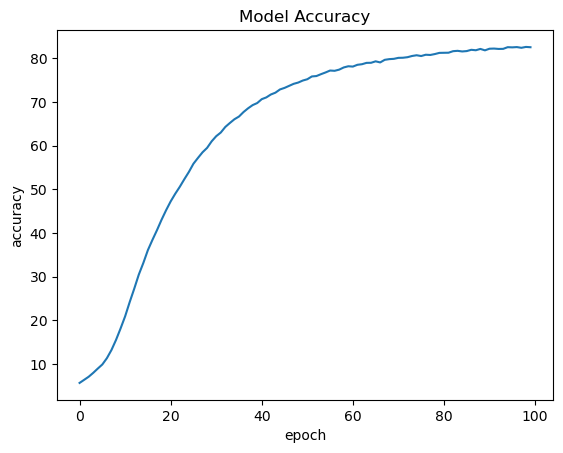

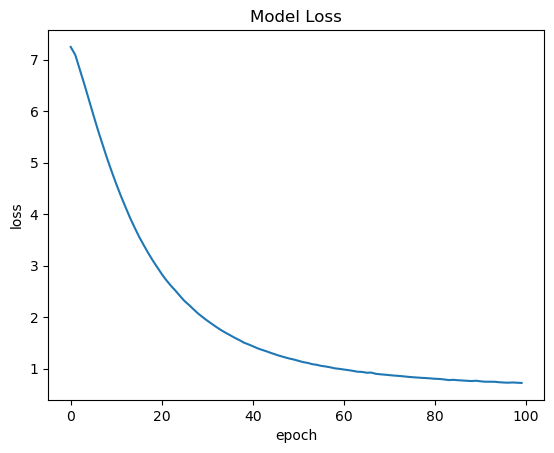

In [2]:
from pickle import load
import matplotlib.pyplot as plt

with open('trainHistoryOld', 'rb') as handle: # loading old history
    oldhstry = load(handle)

# Plotting the Accuracy vs Epoch Graph
oldhstry['accuracy'] = [acc * 100 for acc in oldhstry['accuracy']]
plt.plot(oldhstry['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plotting the Loss vs Epoch Graphs
plt.plot(oldhstry['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [7]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted = np.argmax(predicted_probs)

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text=str.capitalize(seed_text)
        seed_text += " " + output_word

    seed_text+="."
    return seed_text

In [8]:
print (generate_text("kanada", 7, loaded_model, max_sequence_len))
print (generate_text("polis", 15, loaded_model, max_sequence_len))
print (generate_text("piyano", 4, loaded_model, max_sequence_len))
print (generate_text("benzin", 5, loaded_model, max_sequence_len))
print (generate_text("benzer", 5, loaded_model, max_sequence_len))
print (generate_text("kuş", 5, loaded_model, max_sequence_len))
print (generate_text("adam", 5, loaded_model, max_sequence_len))
print (generate_text("pencere", 7, loaded_model, max_sequence_len))

Kanada yük treni patlamasında ölü sayısı üçe ulaştı.
Polis shevaun pennington'ın cumartesi günü 31 yaşındaki toby studabaker ile kaçmasının ardından uluslararası bir av başlattı.
Piyano çalan bir adam var.
Benzin istasyonlarının dışında uzun kuyruklar oluştu.
Benzer tasarılar iki kez meclis'ten geçti.
Kuş ağaçtaki yiyecekleri bir kaseden yedi.
Adam gitar çalıyor ve şarkı söylüyor.
